In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data PreProcessing

In [4]:
data = pd.read_csv('hospital data analysis.csv')

In [5]:
df = pd.DataFrame(data)

In [6]:
data.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [7]:
data.shape

(984, 10)

In [8]:
data.info

<bound method DataFrame.info of      Patient_ID  Age  Gender          Condition                  Procedure  \
0             1   45  Female      Heart Disease                Angioplasty   
1             2   60    Male           Diabetes            Insulin Therapy   
2             3   32  Female      Fractured Arm           X-Ray and Splint   
3             4   75    Male             Stroke     CT Scan and Medication   
4             5   50  Female             Cancer   Surgery and Chemotherapy   
..          ...  ...     ...                ...                        ...   
979         996   68    Male       Hypertension  Medication and Counseling   
980         997   45  Female       Appendicitis               Appendectomy   
981         998   40    Male      Fractured Leg  Cast and Physical Therapy   
982         999   78  Female       Heart Attack    Cardiac Catheterization   
983        1000   25    Male  Allergic Reaction      Epinephrine Injection   

      Cost  Length_of_Stay Read

In [9]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Condition', 'Procedure', 'Cost',
       'Length_of_Stay', 'Readmission', 'Outcome', 'Satisfaction'],
      dtype='object')

In [10]:
data.isnull().sum()

Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64

In [11]:
data.describe()

,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
count,984.000000,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618,3.598577
std,288.979531,14.941135,7761.990976,19.595805,0.883002
min,1.000000,25.000000,100.000000,1.000000,2.000000
25%,250.750000,45.000000,1000.000000,21.000000,3.000000
50%,500.500000,55.000000,6000.000000,38.000000,4.000000
75%,750.250000,65.000000,15000.000000,54.250000,4.000000
max,1000.000000,78.000000,25000.000000,76.000000,5.000000


In [12]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,0,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,1,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,0,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,1,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,0,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [13]:
data['Readmission'] = data['Readmission'].map({'Yes': 1, 'No': 0})
data.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,0,Heart Disease,Angioplasty,15000,5,0,Recovered,4
1,2,60,1,Diabetes,Insulin Therapy,2000,3,1,Stable,3
2,3,32,0,Fractured Arm,X-Ray and Splint,500,1,0,Recovered,5
3,4,75,1,Stroke,CT Scan and Medication,10000,7,1,Stable,2
4,5,50,0,Cancer,Surgery and Chemotherapy,25000,10,0,Recovered,4


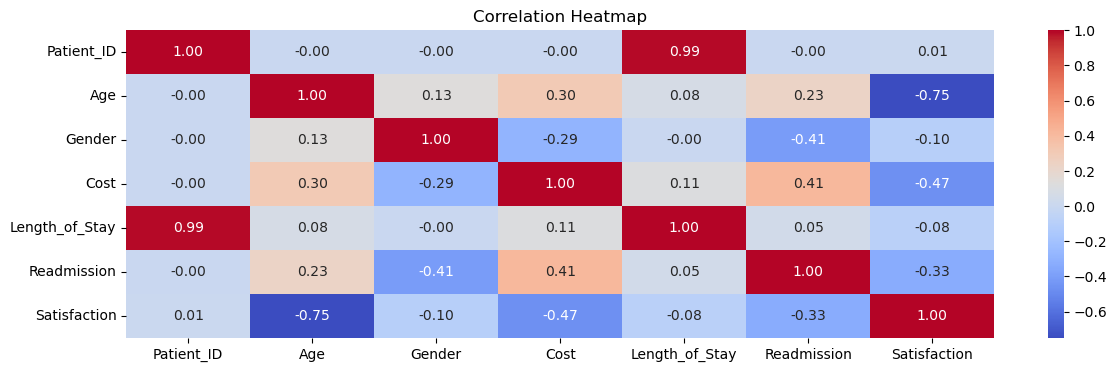

In [14]:
data_numeric = data.drop(columns=['Condition','Procedure','Outcome'])
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(14,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_5636\2975260883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Condition'],palette='tab10')


<Axes: xlabel='count', ylabel='Condition'>

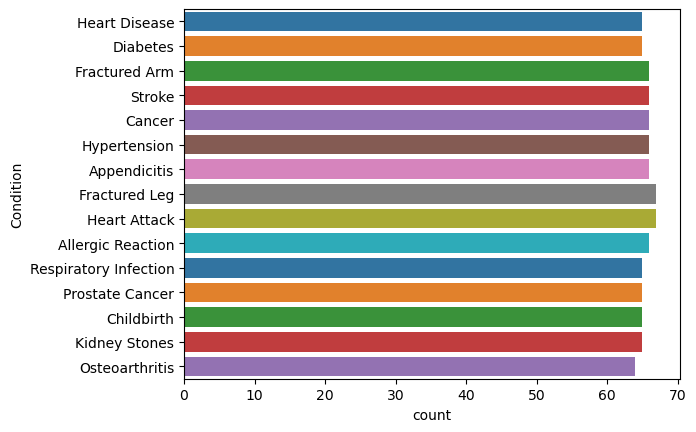

In [15]:
# data['Condition'].value_counts()
sns.countplot(data['Condition'],palette='tab10')

C:\Users\aksha\AppData\Local\Temp\ipykernel_5636\4072424718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data,palette='tab10')  # Use the x parameter


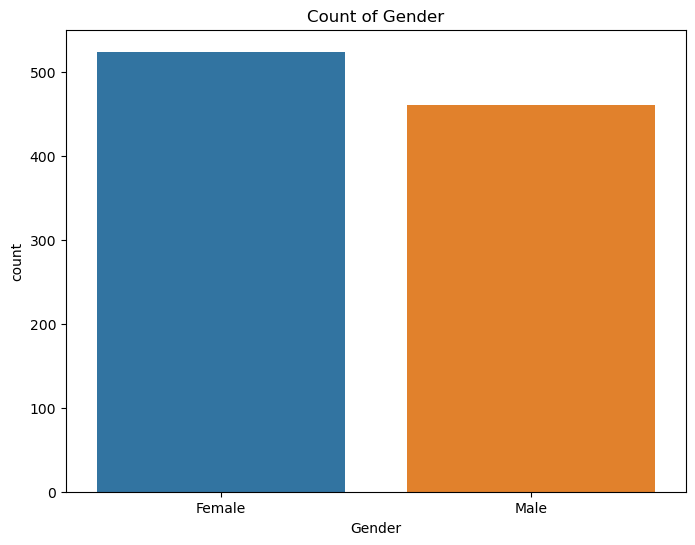

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data,palette='tab10')  # Use the x parameter
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Count of Gender')
plt.show()

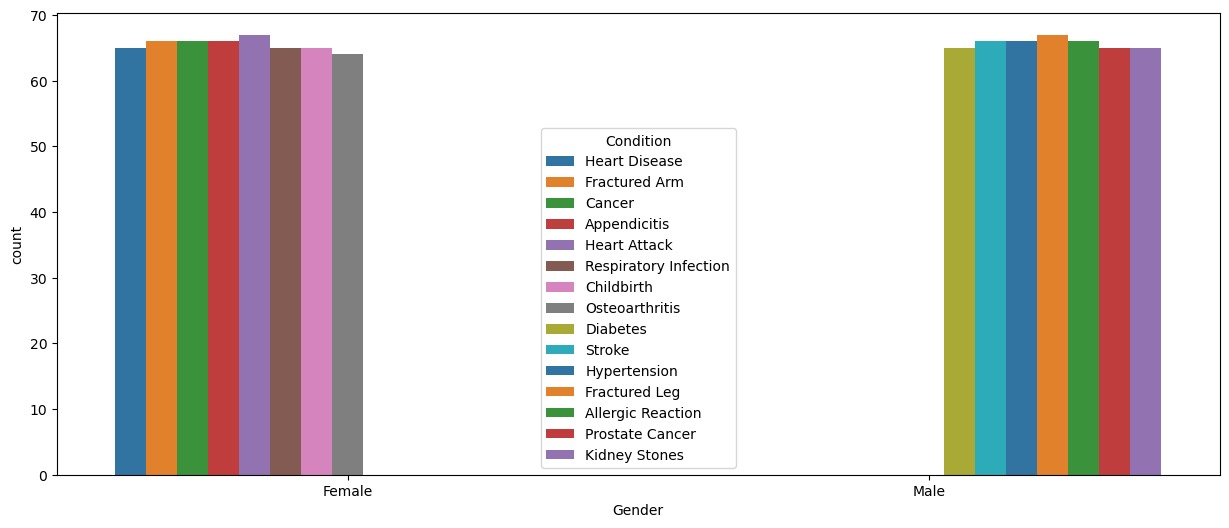

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='Gender',hue='Condition',data=data,palette='tab10')
plt.xticks([1,0],['Male','Female'])
plt.show()

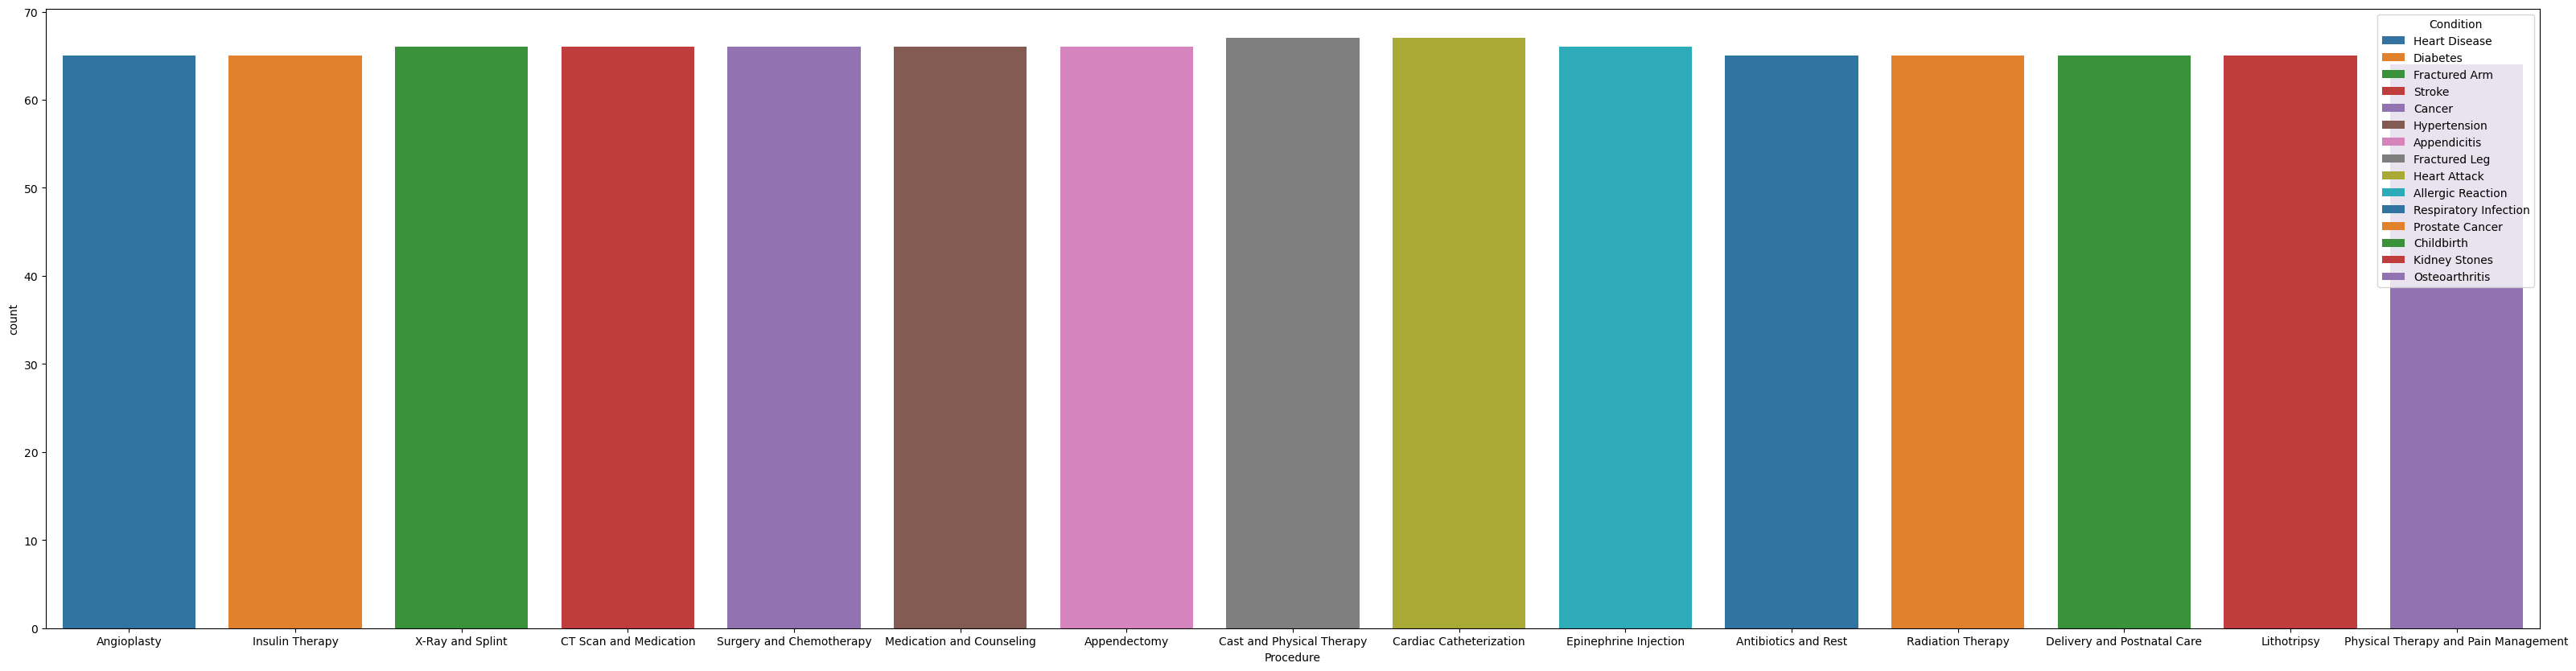

In [18]:
plt.figure(figsize=(40,10))
sns.countplot(x='Procedure',hue='Condition',data=data,palette='tab10')
plt.show()

# Machine Learning

In [20]:
categorical_cols = []
numerical_cols = []

for column in data.columns:
    if column == 'Readmission':
        continue  # Skip the 'Readmission' column
    if data[column].dtype == 'object' or data[column].nunique() <= 10:
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)
        
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Gender', 'Condition', 'Procedure', 'Outcome', 'Satisfaction']
Numerical Columns: ['Patient_ID', 'Age', 'Cost', 'Length_of_Stay']


In [21]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## Split data Train and test

In [24]:
X = data.drop('Readmission', axis=1) 
y = data['Readmission'] 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,Patient_ID,Age,Cost,Length_of_Stay,Gender_1,Condition_Appendicitis,Condition_Cancer,Condition_Childbirth,Condition_Diabetes,Condition_Fractured Arm,...,Procedure_Lithotripsy,Procedure_Medication and Counseling,Procedure_Physical Therapy and Pain Management,Procedure_Radiation Therapy,Procedure_Surgery and Chemotherapy,Procedure_X-Ray and Splint,Outcome_Stable,Satisfaction_3,Satisfaction_4,Satisfaction_5
962,1.657260,1.623589,0.210429,1.804180,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
762,0.950968,-1.724579,-1.065665,0.731977,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
334,-0.555094,-1.925469,-1.065665,-0.748684,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,1.397594,1.087882,0.210429,1.548893,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
529,0.130424,-1.255835,0.468226,0.017175,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.358327,-1.255835,-1.014106,-1.514544,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
270,-0.780138,0.083432,2.143906,-0.493398,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
860,1.297190,0.083432,2.143906,1.548893,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
435,-0.198486,-0.586202,-0.691860,-0.135997,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.8629441624365483

## SVC

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit(X_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.9187817258883249

## KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.9441624365482234

# Non Linear ML

In [42]:
data = pd.read_csv('hospital data analysis.csv')
data.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [43]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,0,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,1,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,0,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,1,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,0,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [44]:
data['Readmission'] = data['Readmission'].map({'Yes': 1, 'No': 0})
data.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,0,Heart Disease,Angioplasty,15000,5,0,Recovered,4
1,2,60,1,Diabetes,Insulin Therapy,2000,3,1,Stable,3
2,3,32,0,Fractured Arm,X-Ray and Splint,500,1,0,Recovered,5
3,4,75,1,Stroke,CT Scan and Medication,10000,7,1,Stable,2
4,5,50,0,Cancer,Surgery and Chemotherapy,25000,10,0,Recovered,4


In [45]:
categorical_cols = []
numerical_cols = []

for column in data.columns:
    if column == 'Readmission':
        continue  # Skip the 'Readmission' column
    if data[column].dtype == 'object' or data[column].nunique() <= 10:
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)
        
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Gender', 'Condition', 'Procedure', 'Outcome', 'Satisfaction']
Numerical Columns: ['Patient_ID', 'Age', 'Cost', 'Length_of_Stay']


In [46]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [47]:
X = data.drop('Readmission',axis=1)
y = data['Readmission']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

## Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred4 = dt.predict(X_test)
accuracy_score(y_test,y_pred4)

1.0

## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=100)

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10)

In [58]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.934010152284264

In [59]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                          'ACC':[accuracy_score(y_test,y_pred),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),]})

In [60]:
final_data

,Models,ACC
0,LR,0.862944
1,SVM,0.918782
2,KNN,0.944162
3,DT,1.000000
4,RF,0.934010


C:\Users\aksha\AppData\Local\Temp\ipykernel_5636\3219938391.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data,palette='tab10')


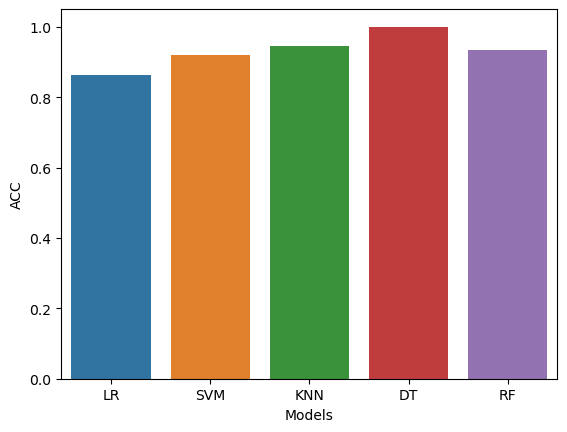

In [61]:
sns.barplot(x='Models', y='ACC', data=final_data,palette='tab10')
plt.show()

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation accuracy scores: [0.97461929 1.         0.96446701 1.         0.96428571]
Mean cross-validation score: 0.9806744017403917


In [63]:
from sklearn.metrics import classification_report

y_pred7 = rf.predict(X_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       138
           1       1.00      0.78      0.88        59

    accuracy                           0.93       197
   macro avg       0.96      0.89      0.92       197
weighted avg       0.94      0.93      0.93       197



In [64]:
new_data = pd.DataFrame({
    'Patient_ID': [101],  
    'Age': [45],  
    'Gender': [1],  # Male
    'Condition': ['Heart Disease'],  
    'Procedure': ['Angioplasty'],  
    'Cost': [20000],  
    'Length_of_Stay': [5],  
    'Outcome': ['Critical'],  
    'Satisfaction': [5]
})

In [65]:
new_data

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Outcome,Satisfaction
0,101,45,1,Heart Disease,Angioplasty,20000,5,Critical,5


In [66]:
new_data_processed = pd.get_dummies(new_data, columns=['Gender','Condition', 'Procedure', 'Outcome', 'Satisfaction'])
missing_cols = set(X_train.columns) - set(new_data_processed.columns)
for col in missing_cols:
    new_data_processed[col] = 0
new_data_processed = new_data_processed[X_train.columns]
probability = rf.predict_proba(new_data_processed)[:, 1]
print(probability)

high_threshold = 0.4  
medium_threshold = 0.3 

if probability[0] > high_threshold:
    result = "High (Readmission required)"
elif medium_threshold <= probability[0] <= high_threshold:
    result = "Medium (50% chance of readmission)"
else:
    result = "Low (No readmission required)"

print(f"Predicted Readmission Status: {result}")

[0.46801313]
Predicted Readmission Status: High (Readmission required)


In [67]:
n_data = pd.DataFrame({
    'Patient_ID': [2023],  # Unique Patient ID
    'Age': [30],  # Relatively younger age
    'Gender': [0],  # Female
    'Condition': ['Stable'],  # No serious conditions
    'Procedure': ['Routine Check-up'],  # Non-invasive procedure
    'Cost': [1500],  # Low medical cost indicating a minor issue
    'Length_of_Stay': [2],  # Short hospital stay
    'Outcome': ['Recovered'],  # Good recovery outcome
    'Satisfaction': [5]   # You can exclude this column when predicting
})

In [68]:
n_data

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Outcome,Satisfaction
0,2023,30,0,Stable,Routine Check-up,1500,2,Recovered,5


In [69]:
new_data_processed = pd.get_dummies(n_data, columns=['Gender','Condition', 'Procedure', 'Outcome', 'Satisfaction'])
missing_cols = set(X_train.columns) - set(new_data_processed.columns)
for col in missing_cols:
    new_data_processed[col] = 0
new_data_processed = new_data_processed[X_train.columns]
probability = rf.predict_proba(new_data_processed)[:, 1]
print(probability)

high_threshold = 0.4  
medium_threshold = 0.3 

if probability[0] > high_threshold:
    result = "High (Readmission required)"
elif medium_threshold <= probability[0] <= high_threshold:
    result = "Medium (50% chance of readmission)"
else:
    result = "Low (No readmission required)"

print(f"Predicted Readmission Status: {result}")

[0.17889049]
Predicted Readmission Status: Low (No readmission required)


In [70]:
n1_data = pd.DataFrame({
    'Patient_ID': [2001],
    'Age': [78],  # Older age can increase readmission risk
    'Gender': ['Male'],  # Gender can play a role in certain conditions
    'Condition': ['Heart Failure'],  # A condition that often leads to readmissions
    'Procedure': ['Heart Surgery'],  # A significant procedure that could lead to complications
    'Cost': [50000],  # High cost could indicate severity of condition
    'Length_of_Stay': [10],  # Longer stays can correlate with higher readmission
    'Outcome': ['Critical'],  # Indicates serious health status at discharge
    'Satisfaction': [1]   # You can exclude this column when predicting
})

In [71]:
n1_data

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Outcome,Satisfaction
0,2001,78,Male,Heart Failure,Heart Surgery,50000,10,Critical,1


In [72]:
new_data_processed = pd.get_dummies(n1_data, columns=['Gender','Condition', 'Procedure', 'Outcome', 'Satisfaction'])
missing_cols = set(X_train.columns) - set(new_data_processed.columns)
for col in missing_cols:
    new_data_processed[col] = 0
new_data_processed = new_data_processed[X_train.columns]
probability = rf.predict_proba(new_data_processed)[:, 1]
print(probability)

high_threshold = 0.4  
medium_threshold = 0.3 

if probability[0] > high_threshold:
    result = "High (Readmission required)"
elif medium_threshold <= probability[0] <= high_threshold:
    result = "Medium (50% chance of readmission)"
else:
    result = "Low (No readmission required)"

print(f"Predicted Readmission Status: {result}")

[0.5346429]
Predicted Readmission Status: High (Readmission required)


In [73]:
n3_data = pd.DataFrame({
'Patient_ID': [2023],
    'Age': [65],
    'Gender': ['Female'],  # Assume Female is mapped to 0
    'Condition': ['Heart Disease'],  # One of the conditions in your dataset
    'Procedure': ['Angioplasty'],  # A common procedure for heart conditions
    'Cost': [15000],  # Reasonable cost associated with the procedure
    'Length_of_Stay': [6],  # Moderate length of stay
    'Outcome': ['Stable'],  # Stable outcome
    'Satisfaction': [3],
})

In [74]:
n3_data

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Outcome,Satisfaction
0,2023,65,Female,Heart Disease,Angioplasty,15000,6,Stable,3


In [75]:
new_data_processed = pd.get_dummies(n3_data, columns=['Gender','Condition', 'Procedure', 'Outcome', 'Satisfaction'])
missing_cols = set(X_train.columns) - set(new_data_processed.columns)
for col in missing_cols:
    new_data_processed[col] = 0
new_data_processed = new_data_processed[X_train.columns]
probability = rf.predict_proba(new_data_processed)[:, 1]
print(probability)

high_threshold = 0.4  
medium_threshold = 0.3 

if probability[0] > high_threshold:
    result = "High (Readmission required)"
elif medium_threshold <= probability[0] <= high_threshold:
    result = "Medium (50% chance of readmission)"
else:
    result = "Low (No readmission required)"

print(f"Predicted Readmission Status: {result}")

[0.82804253]
Predicted Readmission Status: High (Readmission required)


## Save Model using Joblib

In [77]:
import joblib

In [78]:
joblib.dump(rf,'model_joblib_readmission')

['model_joblib_readmission']

In [79]:
model = joblib.load('model_joblib_readmission')

In [80]:
probability = model.predict_proba(new_data_processed)[:, 1]